In [1]:
import pandas as pd
import os, shutil
import tensorflow as tf
import IPython.display as display
import numpy as np
import time
import functools
from sklearn.metrics import confusion_matrix, f1_score
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.optimizers import RMSprop
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

# Load in Images

The data directories are comprised of the file path strings, one for each train, test, and split. Within the file paths are two folders. One folder has normal chest xray photos (no pneumonia) and another folder has chest xrays of people with pneumonia.

In [2]:
datadir_train = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/train'
datadir_test = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/test'
datadir_validate = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/val'
categories = ['NORMAL', 'PNEUMONIA']

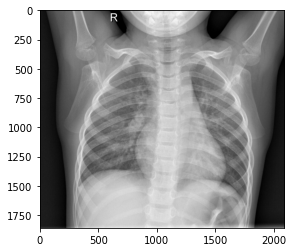

In [3]:
#within the train dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_train, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

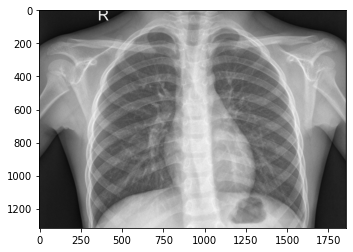

In [4]:
#within the test dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_test, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

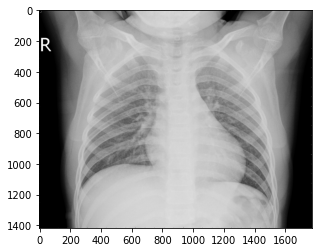

In [5]:
#within the validate dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_validate, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

# Data Augmentation

In [6]:
data_train = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_train, 
        target_size=(256, 256), 
        batch_size = 128, 
        seed = 123,
        class_mode="binary") 

Found 5216 images belonging to 2 classes.


In [7]:
data_test = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_test, 
        target_size=(256, 256), 
        batch_size = 128, 
        seed = 123,
        class_mode="binary",
        shuffle = False) 

Found 624 images belonging to 2 classes.


In [8]:
data_val = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_validate, 
        target_size=(256, 256), 
        batch_size = 16, 
        seed = 12,
        class_mode="binary",
        shuffle = False) 

Found 16 images belonging to 2 classes.


In [9]:
train_images, train_labels = next(data_train)
test_images, test_labels = next(data_test)
val_images, val_labels = next(data_val)

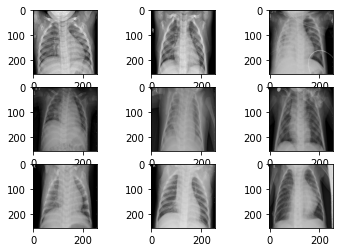

In [10]:
#visualize images
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(train_images[i])
plt.show()

# Modeling

In [11]:
X_train = np.array(train_images)
y_train = np.array(train_labels)

X_test = np.array(test_images)
y_test = np.array(test_labels)

X_val = np.array(val_images)
y_val = np.array(val_labels)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(128, 256, 256, 3)
(128,)
(128, 256, 256, 3)
(128,)
(16, 256, 256, 3)
(16,)


In [13]:
# test = y_train.reshape((-1, 256, 256, 1))

In [14]:
# y_train = np.reshape(y_train[:,0], (5216,1))

In [15]:
#reshape labels

# labels = np.reshape(labels[:,0], (5216,1))

# Modeling

## Model One - Feedforward Neural Network (Dense layers) - generic

In [16]:
num_classes = 1

# specifying the model structure
model = Sequential()


# y_train = keras.utils.to_categorical(y_train-1, num_classes, dtype='int')
# y_test = keras.utils.to_categorical(y_test-1, num_classes, dtype='int')


print(y_train.shape)
print(X_train.shape)
# print(y_test)
# y_train = np.array(y_train)

# specify the first hidden layer
# X_train_reshape = np.array(X_train).reshape(-1, 1, 1)
# print(X_train_reshape)
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# specify the second layer
model.add(Dense(64))
model.add(Dropout(0.2))

# specify the output layer
model.add(Dense(num_classes, activation='sigmoid'))

# model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_train.flatten()[:len(y_train)], y_train,
                    batch_size= 1,
                    epochs=4,
                    verbose=1,
                    validation_data=(X_val.flatten()[:len(y_val)], y_val.flatten()))
score = model.evaluate(X_test.flatten()[:len(y_test)], y_test.flatten(), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(128,)
(128, 256, 256, 3)
Epoch 1/4
128/128 [==============================] - 2s 10ms/step - loss: 0.6121 - accuracy: 0.7742 - val_loss: 0.9115 - val_accuracy: 0.5000
Epoch 2/4
128/128 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.8541 - val_loss: 1.0248 - val_accuracy: 0.5000
Epoch 3/4
128/128 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.8421 - val_loss: 0.9880 - val_accuracy: 0.5000
Epoch 4/4
128/128 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.7670 - val_loss: 1.1185 - val_accuracy: 0.5000
Test loss: 1.6776667833328247
Test accuracy: 0.0


## Model Two - CNN

In [ ]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn.add(layers.MaxPooling2D((2, 2),padding='same')) #padding added so edge pixels get included in convolution
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same')) #hidden layer
cnn.add(layers.MaxPooling2D((2, 2),padding='same')) #max pooling
cnn.add(layers.Flatten()) #flatten layer
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.007),
              metrics=['acc']) #compiling with gradient descent

cnn = cnn.fit(data_train,
                epochs=5,
                batch_size=50,
                validation_data = data_val)

Epoch 1/5
33/41 [=======================>......] - ETA: 1:16 - loss: 4.1949 - acc: 0.6200

In [ ]:
cnn.summary()

In [ ]:
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

## Model 3 - Also CNN

In [20]:
tic = time.time()
cnn3 = models.Sequential()
cnn3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn3.add(layers.AveragePooling2D((2, 2),padding='same'))
cnn3.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn3.add(layers.AveragePooling2D((2, 2),padding='same'))
cnn3.add(layers.Flatten())
cnn3.add(layers.Dense(32, activation='relu'))
cnn3.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn3.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.002),
              metrics=['acc', 'recall', 'percision', 'f1'])

In [21]:
cnn3 = cnn3.fit(data_train,
                epochs=9,
                batch_size=25,
                validation_data=(data_val))
toc = time.time()
print('run time:', toc-tic)

Epoch 1/9


ValueError: in user code:

    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\raizel\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_9 is incompatible with the layer: expected axis -1 of input shape to have value 516128 but received input with shape (None, 127008)


## Model 4 - CNN

In [ ]:
tic = time.time()
cnn4 = models.Sequential()
cnn4.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn4.add(layers.MaxPooling2D((2, 2),padding='same'))
cnn4.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn4.add(layers.AveragePooling2D((2, 2),padding='same'))
cnn4.add(layers.Flatten())
cnn4.add(layers.Dense(32, activation='relu'))
cnn4.add(layers.Dropout(.5))
cnn4.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn4.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.002),
              metrics=['acc', 'Recall', 'AUC'])

In [ ]:
cnn4 = cnn4.fit(X_train,
                y_train,
                epochs=5,
                batch_size=25,
                validation_data=(X_val, y_val))
toc = time.time()
print('run time:', toc-tic)

## Model 5

In [ ]:
from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Model

In [ ]:
imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False)
imagenet_new=imagenet.output
inception_model = models.Sequential()
inception_model.add(imagenet)
inception_model.add(GlobalAveragePooling2D())
inception_model.add(Dense(1024,activation='relu'))
inception_model.add(Dense(1024,activation='relu')) #dense layer 2
inception_model.add(Dense(512,activation='relu')) #dense layer 3
inception_model.add(Dense(1,activation='sigmoid')) #final layer with sigmoid activation

In [ ]:
inception_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy', 'recall', 'percision', 'AUC'])

# step_size_train=train_generator.n//train_generator.batch_size
inception_model.fit(X_train,
          y_train,
          epochs=6,
          batch_size=32,
          validation_data=(X_val, y_val))

In [ ]:
inception_model.evaluate(X_test, y_test)

In [ ]:
predictions_transfer = inception_model.predict(X_test)
predictions_transfer = np.around(predictions_transfer)

## Additional Data Augmentation

In [16]:
data_train = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2, 
                                shear_range=0.3, 
                                zoom_range=0.1, 
                                horizontal_flip=False).flow_from_directory(datadir_train, target_size=(256, 256), 
                                                                           batch_size = 5216, seed = 27, class_mode="binary") 

Found 5216 images belonging to 2 classes.


In [ ]:
data_test = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2, 
                                shear_range=0.3, 
                                zoom_range=0.1, 
                                horizontal_flip=False).flow_from_directory(datadir_test, target_size=(256, 256), 
                                                                           batch_size = 5216, seed = 27, class_mode="binary") 

In [ ]:
data_val = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2, 
                                shear_range=0.3, 
                                zoom_range=0.1, 
                                horizontal_flip=False).flow_from_directory(datadir_validate, target_size=(256, 256), 
                                                                           batch_size = 5216, seed = 27, class_mode="binary") 

# Model 6 - Resnet

In [ ]:
tf.keras.applications.ResNet50(
    include_top = False,
    weights = "imagenet",
    input_tensor =None,
    input_shape = (256, 256, 3),
    pooling=None)